In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the review data
review = pd.read_csv("cap_yelp.csv")

In [3]:
review

,Number of Records,Address,Business Id (Review),Business Id,Category,City,Cool,Date,Funny,Id (Category),...,Name,Neighborhood,Postal Code,Review Count,Stars (Review),Stars,State,Text,Useful,User Id
0,1,"421 Dundas St W, 3rd Fl",Rh2smrKvcamnP8VBUgMI0Q,Rh2smrKvcamnP8VBUgMI0Q,Restaurants,Toronto,0,11/20/2017 12:00:00 AM,0,938,...,Dim Sum King Seafood Restaurant,Chinatown,M5T 1G6,165,2,3.5,ON,2.5 stars? Not sure how this displaced Rol Sa...,0,4WoAauE_v-vwMuQ665rMyA
1,1,688 Queen Street E,SGIngUI_qmRBDM0_3b55jg,SGIngUI_qmRBDM0_3b55jg,Restaurants,Toronto,2,6/7/2009 12:00:00 AM,2,7365,...,Burger Shoppe,Riverdale,M4M 1G9,48,4,3.0,ON,Since my work requires an hour-long commute fr...,2,xgv5fUXxZ1lO-yc32X4j8g
2,1,691 Bloor Street W,nHFJtud7jWZhM9dHQ1eIRA,nHFJtud7jWZhM9dHQ1eIRA,Restaurants,Toronto,2,10/30/2011 12:00:00 AM,0,10511,...,Buk Chang Dong Soon Tofu,Koreatown,M6G 1L3,381,4,4.0,ON,Massive plate of delicious bulgogi with a side...,1,MfWGWVuUo9bptZ9VcQTC5Q
3,1,1526 Queen Street W,Ae4ABFarGMaI5lk1i98A0w,Ae4ABFarGMaI5lk1i98A0w,Restaurants,Toronto,0,7/24/2016 12:00:00 AM,0,11294,...,Himalayan Kitchen,Parkdale,M6R 1A1,47,4,4.5,ON,Ate the momos during the momo crawl.. Was the ...,0,Y6qylbHq8QJmaCRSlKdIog
4,1,598 Bay Street,RwRNR4z3kY-4OsFqigY5sw,RwRNR4z3kY-4OsFqigY5sw,Restaurants,Toronto,0,5/29/2015 12:00:00 AM,1,19725,...,Uncle Tetsu's Japanese Cheesecake,Downtown Core,M5G 1M5,848,3,3.5,ON,Not worth the 2 hour wait.\r\nDon't be fooled ...,0,V8oCtUzsdHA_Z9QpGaHCBg
5,1,881 Yonge Street,DKZN5IjHEE_BCDCRLxb7sQ,DKZN5IjHEE_BCDCRLxb7sQ,Restaurants,Toronto,0,4/11/2017 12:00:00 AM,0,26109,...,Mykonos Mediterranean Grill,NaN,M4W 2H2,72,5,4.0,ON,We recently had an amazing catering experience...,0,7-wMHgWs8s94p7eEg6TQAw
6,1,491 Church Street,r49iBfbnfoK7yt4rdsL_7g,r49iBfbnfoK7yt4rdsL_7g,Restaurants,Toronto,0,1/29/2017 12:00:00 AM,0,28938,...,Fushimi,Church-Wellesley Village,M4Y 2C6,180,3,3.5,ON,This is definitely one of the best ayce japane...,0,aOjGZMoekjWcarvDwDx5Sg
7,1,64 Kingston Road,Qc3AcWYUTWglEa-9-RACwQ,Qc3AcWYUTWglEa-9-RACwQ,Restaurants,Toronto,0,3/18/2012 12:00:00 AM,0,31562,...,Jody's Deli,Upper Beach,M4L 1S4,23,4,3.0,ON,"Great place......great food, you go to a deli ...",0,B33KLfCt97Gg5mfPhW2AZg
8,1,"633 Silver Star Boulevard ., Unit 125",An-JJle53UMHokU4MwFktg,An-JJle53UMHokU4MwFktg,Restaurants,Toronto,0,6/5/2016 12:00:00 AM,0,31823,...,Deer Garden Signatures,Milliken,M1V 5N1,122,1,3.5,ON,After two years I figured I'll give this place...,0,6mVlohHaYcG-mu-aqQaaPA
9,1,718 Queen Street E,3zyt4IW7Ic0yyeiLV7hk_w,3zyt4IW7Ic0yyeiLV7hk_w,Restaurants,Toronto,0,11/22/2017 12:00:00 AM,0,33705,...,Urban House,Riverdale,M4M 1H2,4,4,4.5,ON,We came here for a breakfast at around 1:00 in...,0,oxNyLrH0momX4Y17tyBzUw


In [4]:
review.head(5)

,Number of Records,Address,Business Id (Review),Business Id,Category,City,Cool,Date,Funny,Id (Category),...,Name,Neighborhood,Postal Code,Review Count,Stars (Review),Stars,State,Text,Useful,User Id
0,1,"421 Dundas St W, 3rd Fl",Rh2smrKvcamnP8VBUgMI0Q,Rh2smrKvcamnP8VBUgMI0Q,Restaurants,Toronto,0,11/20/2017 12:00:00 AM,0,938,...,Dim Sum King Seafood Restaurant,Chinatown,M5T 1G6,165,2,3.5,ON,2.5 stars? Not sure how this displaced Rol Sa...,0,4WoAauE_v-vwMuQ665rMyA
1,1,688 Queen Street E,SGIngUI_qmRBDM0_3b55jg,SGIngUI_qmRBDM0_3b55jg,Restaurants,Toronto,2,6/7/2009 12:00:00 AM,2,7365,...,Burger Shoppe,Riverdale,M4M 1G9,48,4,3.0,ON,Since my work requires an hour-long commute fr...,2,xgv5fUXxZ1lO-yc32X4j8g
2,1,691 Bloor Street W,nHFJtud7jWZhM9dHQ1eIRA,nHFJtud7jWZhM9dHQ1eIRA,Restaurants,Toronto,2,10/30/2011 12:00:00 AM,0,10511,...,Buk Chang Dong Soon Tofu,Koreatown,M6G 1L3,381,4,4.0,ON,Massive plate of delicious bulgogi with a side...,1,MfWGWVuUo9bptZ9VcQTC5Q
3,1,1526 Queen Street W,Ae4ABFarGMaI5lk1i98A0w,Ae4ABFarGMaI5lk1i98A0w,Restaurants,Toronto,0,7/24/2016 12:00:00 AM,0,11294,...,Himalayan Kitchen,Parkdale,M6R 1A1,47,4,4.5,ON,Ate the momos during the momo crawl.. Was the ...,0,Y6qylbHq8QJmaCRSlKdIog
4,1,598 Bay Street,RwRNR4z3kY-4OsFqigY5sw,RwRNR4z3kY-4OsFqigY5sw,Restaurants,Toronto,0,5/29/2015 12:00:00 AM,1,19725,...,Uncle Tetsu's Japanese Cheesecake,Downtown Core,M5G 1M5,848,3,3.5,ON,Not worth the 2 hour wait.\r\nDon't be fooled ...,0,V8oCtUzsdHA_Z9QpGaHCBg


In [5]:
review.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number of Records,11906.0,1.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000
Cool,11906.0,0.487821,1.463449,0.0000,0.0000,0.0000,0.0000,40.0000
Funny,11906.0,0.400050,1.524752,0.0000,0.0000,0.0000,0.0000,50.0000
Id (Category),11906.0,331002.909961,194591.321815,58.0000,160841.0000,325199.0000,500476.0000,667441.0000
Is Open,11906.0,0.836301,0.370018,0.0000,1.0000,1.0000,1.0000,1.0000
Latitude,11906.0,43.671336,0.039282,43.5896,43.6489,43.6564,43.6711,43.8357
Longitude,11906.0,-79.392163,0.044267,-79.7034,-79.4097,-79.3928,-79.3795,-79.1395
Review Count,11906.0,167.858475,204.770416,3.0000,46.0000,100.0000,212.0000,1494.0000
Stars (Review),11906.0,3.584075,1.266051,1.0000,3.0000,4.0000,5.0000,5.0000
Stars,11906.0,3.603267,0.550421,1.0000,3.5000,3.5000,4.0000,5.0000


In [6]:
samplepdf = review.sample(n=5000)

In [7]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(samplepdf["User Id"])
samplepdf["nuser_id"] = le.transform(samplepdf["User Id"])
le = preprocessing.LabelEncoder()
le.fit(samplepdf["Business Id"])
samplepdf["nbiz_id"] = le.transform(samplepdf["Business Id"])
le.fit(samplepdf["Id (Review)"])
samplepdf["nrev_id"] = le.transform(samplepdf["Id (Review)"])


In [8]:
samplepdf.describe()

,Number of Records,Cool,Funny,Id (Category),Is Open,Latitude,Longitude,Review Count,Stars (Review),Stars,Useful,nuser_id,nbiz_id,nrev_id
count,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.0,0.506200,0.419200,329595.550600,0.843800,43.671626,-79.391831,166.337400,3.586200,3.601300,1.104000,2049.601400,1247.745000,2499.500000
std,0.0,1.533764,1.560884,196365.835158,0.363081,0.039043,0.044226,205.271326,1.260035,0.556462,2.230197,1182.234807,715.917535,1443.520003
min,1.0,0.000000,0.000000,58.000000,0.000000,43.592500,-79.703400,3.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,156936.000000,1.000000,43.649100,-79.409200,46.000000,3.000000,3.500000,0.000000,1045.750000,626.000000,1249.750000
50%,1.0,0.000000,0.000000,319829.500000,1.000000,43.656900,-79.392750,98.000000,4.000000,3.500000,0.000000,2051.000000,1257.500000,2499.500000
75%,1.0,0.000000,0.000000,501895.000000,1.000000,43.671800,-79.379500,205.000000,5.000000,4.000000,1.000000,3054.000000,1856.000000,3749.250000
max,1.0,30.000000,45.000000,667333.000000,1.000000,43.835400,-79.169300,1494.000000,5.000000,5.000000,33.000000,4133.000000,2480.000000,4999.000000


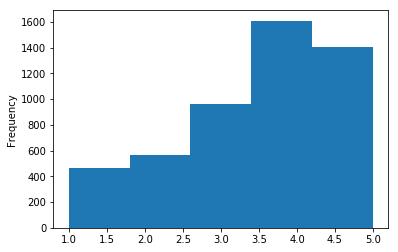

In [9]:
samplepdf['Stars (Review)'].plot.hist(bins=5)

In [10]:
def sentiment_calc(text):
    try:
        return int((TextBlob(text).sentiment.polarity+1)*4.0/2.0)+1
    except:
        return 0
    
def to_int(text):
    try:
        return (int(str(text)))
    except:
        return 0

samplepdf['sscore'] = samplepdf['Text'].apply(sentiment_calc)
samplepdf['nuseful']= samplepdf['Useful'].apply(to_int)
samplepdf['ncool']= samplepdf['Cool'].apply(to_int)
samplepdf['nfunny']= samplepdf['Funny'].apply(to_int)


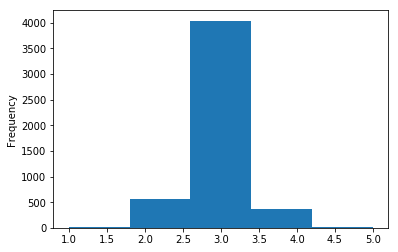

In [11]:
samplepdf["sscore"].plot.hist(bins=5)

In [12]:
samplepdf['ascore'] = samplepdf['Stars (Review)']+samplepdf['sscore']

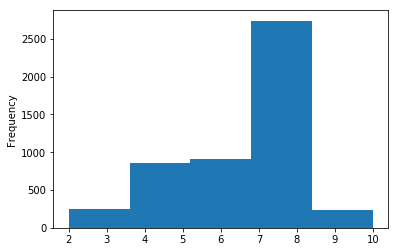

In [13]:
samplepdf["ascore"].plot.hist(bins=5)

In [14]:
samplepdf["mscore"] = (samplepdf['Stars (Review)']+samplepdf["sscore"])/2

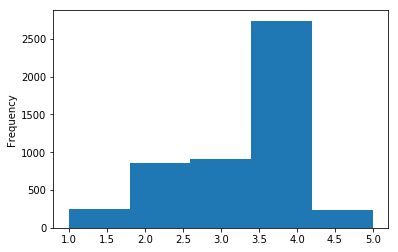

In [15]:
samplepdf["mscore"].plot.hist(bins=5)

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=1, svd_solver='arpack')
scaler = MinMaxScaler()

samplepdf["fscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["sscore",'Stars (Review)']])))*5

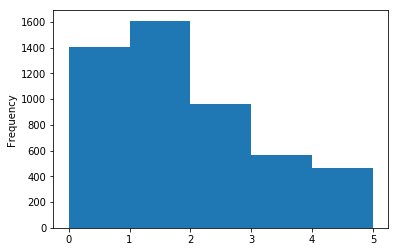

In [17]:
samplepdf["fscore"].plot.hist(bins=5)

In [18]:
samplepdf["ffscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["sscore",'Stars (Review)','nuseful','nfunny','ncool']])))*5

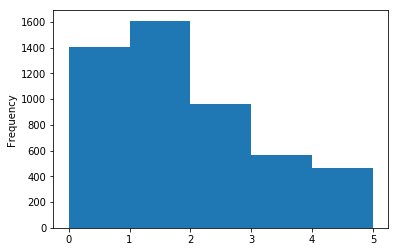

In [19]:
samplepdf["ffscore"].plot.hist(bins=5)

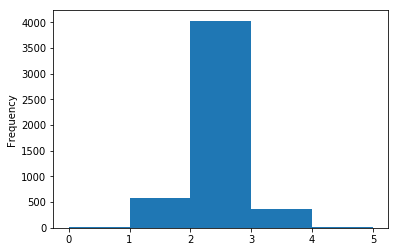

In [20]:
samplepdf["sfscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["sscore",'nuseful','nfunny','ncool']])))*5
samplepdf["sfscore"].plot.hist(bins=5)

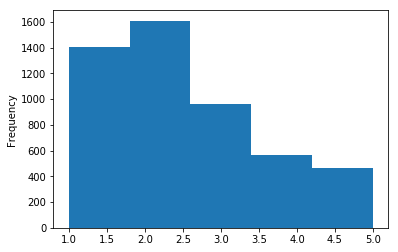

In [21]:
samplepdf["gfscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["Stars (Review)","sscore",'nuseful','nfunny','ncool']])))*4+1
samplepdf["gfscore"].plot.hist(bins=5)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df = 5, ngram_range = (1,2),stop_words='english').fit(samplepdf['Text'])
nvec = vect.transform(samplepdf['Text'])

In [23]:
npdf = pd.DataFrame(nvec.A, columns=vect.get_feature_names())

In [24]:
#npdf["npscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(npdf.loc[:,:])))*4+1
#npdf["npscore"].plot.hist(bins=5)

In [25]:
#npdf["nsscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(npdf.loc[:,:],samplepdf.loc[:,['sscore']])))*4+1
#npdf["nsscore"].plot.hist(bins=5)

In [26]:
npdf["sscore"] = samplepdf["sscore"].values

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(npdf)

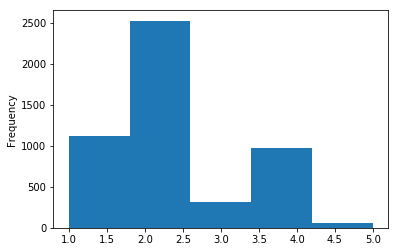

In [28]:
kmeans = kmeans+1
samplepdf['class'] = kmeans
samplepdf['class'].plot.hist(bins=5)

In [29]:
from sklearn.model_selection import train_test_split
ratings_base, ratings_test = train_test_split(samplepdf, test_size=0.25, random_state=42)

In [30]:
Number_Biz = len(np.unique(samplepdf["nbiz_id"])) 
Number_Users = len(np.unique(samplepdf["nuser_id"]))

print(Number_Biz)
print(Number_Users)

2481
4134


In [31]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","Stars (Review)"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","Stars (Review)"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [32]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [33]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [34]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [36]:
print('User-based CF RMSE: ' + str(rmse(test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))

User-based CF RMSE: 0.04156796469688679
Item-based CF RMSE: 0.02259061456198319


In [37]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix[test_data_matrix.nonzero()].flatten(),item_prediction[test_data_matrix.nonzero()].flatten())))
print('user r2 -'+str(r2_score(test_data_matrix[test_data_matrix.nonzero()].flatten(),user_prediction[test_data_matrix.nonzero()].flatten())))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix[test_data_matrix.nonzero()].flatten(),item_prediction[test_data_matrix.nonzero()].flatten())))
print('user mse -'+str(mean_squared_error(test_data_matrix[test_data_matrix.nonzero()].flatten(),user_prediction[test_data_matrix.nonzero()].flatten())))


from sklearn.metrics import accuracy_score
print('item accuracy -'+str(accuracy_score(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),item_prediction[test_data_matrix.nonzero()].flatten().astype(int))))
print('user accuracy -'+str(accuracy_score(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),user_prediction[test_data_matrix.nonzero()].flatten().astype(int))))

from sklearn.metrics import classification_report
print('item cr -'+str(classification_report(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),item_prediction[test_data_matrix.nonzero()].flatten().astype(int))))
print('user cr -'+str(classification_report(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),user_prediction[test_data_matrix.nonzero()].flatten().astype(int))))



item r2 --8.258143764136411
user r2 --8.255265060458557
item mse -14.139925938390483
user mse -14.135529305778112
item accuracy -0.0
user accuracy -0.0


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


item cr -             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00       104
          2       0.00      0.00      0.00       160
          3       0.00      0.00      0.00       256
          4       0.00      0.00      0.00       402
          5       0.00      0.00      0.00       328

avg / total       0.00      0.00      0.00      1250

user cr -             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00       104
          2       0.00      0.00      0.00       160
          3       0.00      0.00      0.00       256
          4       0.00      0.00      0.00       402
          5       0.00      0.00      0.00       328

avg / total       0.00      0.00      0.00      1250



In [38]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","class"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","class"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse( test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))

User-based CF RMSE: 0.02748946581162477
Item-based CF RMSE: 0.015833656252088244


In [39]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix,item_prediction)))
print('user r2 -'+str(r2_score(test_data_matrix,user_prediction)))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix,item_prediction)))
print('user mse -'+str(mean_squared_error(test_data_matrix,user_prediction)))

from sklearn.metrics import accuracy_score
print('item accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))

from sklearn.metrics import classification_report
print('item cr -'+str(classification_report(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user cr -'+str(classification_report(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))


item r2 --0.0005789046738533608
user r2 --0.001038366768591943
item mse -0.0007549964058813208
user mse -0.0007556707306084909
item accuracy -0.9998781255197946
user accuracy -0.9998781255197946


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


item cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  10255204
          1       0.00      0.00      0.00       278
          2       0.00      0.00      0.00       644
          3       0.00      0.00      0.00        72
          4       0.00      0.00      0.00       241
          5       0.00      0.00      0.00        15

avg / total       1.00      1.00      1.00  10256454

user cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  10255204
          1       0.00      0.00      0.00       278
          2       0.00      0.00      0.00       644
          3       0.00      0.00      0.00        72
          4       0.00      0.00      0.00       241
          5       0.00      0.00      0.00        15

avg / total       1.00      1.00      1.00  10256454



In [40]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","sscore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","sscore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse( test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))

User-based CF RMSE: 0.03305043048227062
Item-based CF RMSE: 0.018444787330061014


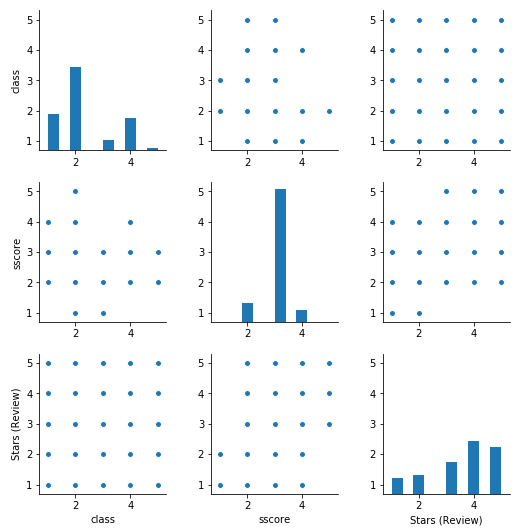

In [44]:
import seaborn as sns;
g = sns.pairplot(samplepdf, vars=["class", "sscore","Stars (Review)"])